# 4 Preprocessing and Training Data<a id='4_Preprocessing_and_Training_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Preprocessing and Training Data](#4_Preprocessing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load The Data](#4.4_Load_The_Data)  
    * [4.4.1 Data](#4.4.1_data)
  * [4.5 Preprocess The Data](#4.5_Preprocess_The_Data)
    * [4.5.1 Scaling](#4.5.1_Scaling)
    * [4.5.2 Null Values and Outliers](#4.5.2_Null_Values_and_Outliers)
    * [4.5.3 Predicted Variable Categorize](#4.5.3_Predicted_Variable_Categorize)
  * [4.6 Data Training](#4.6_Data_Training) 
     * [4.6.1 Split Data and Initialize Model](#4.6.1_Split_Model)
     * [4.6.2 Fit Model](#4.6.2_Fit_Model)
     * [4.6.3 Look at Preliminary Model](#4.6.3_Look_at_Preliminary_Model)
  * [4.7 Summary](#3.7_Summary)


## 4.2 Introduction<a id='4.2_Introduction'></a>

Herein, we will complete any preprocessing required and then split/train the data.  

## 4.3 Imports<a id='4.3_Imports'></a>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import utils
#from sklearn.utils.multiclass import type_of_target

from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
#from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 4.4 Load the Data<a id='4.4_Load_The_Data'></a>

### 4.4.1 Data<a id='4.4.1_data'></a>

In [4]:
df = pd.read_csv('/Users/Hailey/Documents/GitHub/SBwork/Capstone2/Data/data_EDA.csv')
df.head()

,country,adult_anemia_2016,adult_blood_pressure_2015,adult_sodium_2017,basic_sanitation_2017,basic_water_2017,fruit_veg_availability_2013,government_revenue_2020,limited_sanitation_2017,limited_water_2017,...,unimproved_sanitation_2017,unimproved_water_2017,workplaces_percent_change_from_baseline,parkinson_disease_deaths,dementia_deaths,cancers_deaths,economic_rating,macroeconomic_rating,cases_per_cap,day_number
0,S. Korea,23.700000,10.980,5.203333,0.10,1.57,747.25,38.14,0.00,0.0,...,0.00,0.21,-6.486413,3224.604757,29798.685258,89670.950054,3.166667,3.5,35.620943,82
1,Japan,25.600000,17.550,5.766667,1.13,0.56,425.05,38.14,0.00,0.0,...,0.11,0.99,-13.006793,15161.514382,190560.882432,408392.273177,3.166667,3.5,49.931240,84
2,Italy,19.666667,21.170,4.050000,2.56,4.40,736.07,38.14,0.10,0.0,...,1.13,0.56,-32.841150,7608.794566,72574.526515,182277.862996,3.166667,3.5,432.064137,86
3,Germany,18.566667,19.875,3.810000,1.99,0.20,496.91,38.14,0.77,0.0,...,0.00,0.00,-21.465793,12619.472416,83603.200360,250892.527601,3.166667,3.5,283.413813,91
4,France,20.333333,22.050,3.813333,10.28,2.15,579.88,38.14,1.35,0.0,...,0.00,0.00,-32.442342,7622.824664,68727.644036,180571.724245,3.166667,3.5,380.052114,91


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  121 non-null    object 
 1   adult_anemia_2016                        121 non-null    float64
 2   adult_blood_pressure_2015                121 non-null    float64
 3   adult_sodium_2017                        121 non-null    float64
 4   basic_sanitation_2017                    121 non-null    float64
 5   basic_water_2017                         121 non-null    float64
 6   fruit_veg_availability_2013              121 non-null    float64
 7   government_revenue_2020                  121 non-null    float64
 8   limited_sanitation_2017                  121 non-null    float64
 9   limited_water_2017                       121 non-null    float64
 10  nurses_and_midwives_2016                 121 non-n

## 4.5 Preprocess The Data<a id='4.5_Preprocess_The_Data'></a>

### 4.5.1 Scaling<a id='4.5.1_Scaling'></a>

In the previous workbook, we performed scaling in order to complete PCA analysis.  Due to the number of outliers in some of the data, we may want to revist this and consider removing outliers prior to re-scaling. 

In [6]:
# based on initial results, go back and bin days into weeks.
# 82-250
bins = np.linspace(0, 250, 10)
names = [1,2,3,4,5,6,7,8,9] #['w1','w2','w3','w4','w5','w6','w7','w8','w9']

df['week_cat'] = pd.cut(df.day_number, bins, labels=names)

df.week_cat.value_counts()

4    59
5    38
6    11
7     7
9     3
8     2
3     1
2     0
1     0
Name: week_cat, dtype: int64

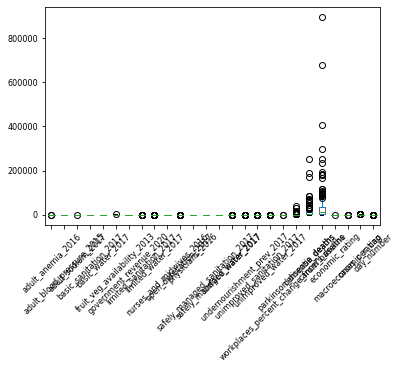

In [78]:
cols = list(df.columns.drop(['country', 'week_cat']))
df.boxplot(column=cols, grid = False, rot=45, fontsize=8)
plt.show()

 Above, we can see that the majority of the columns similar scaling, however, dementia_deaths and cancers_deaths have some extreme outliers.  We would also keep an eye on parkinson_disease_deaths as this column also appears to have outliers.  

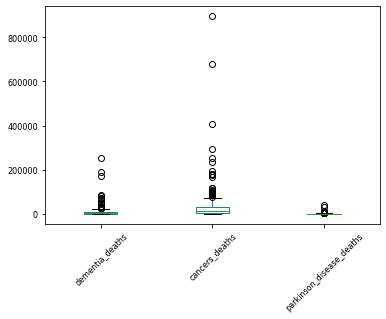

In [6]:
df.boxplot(column=['dementia_deaths', 'cancers_deaths', 'parkinson_disease_deaths'], grid=False, rot=45, fontsize=8)
plt.show()

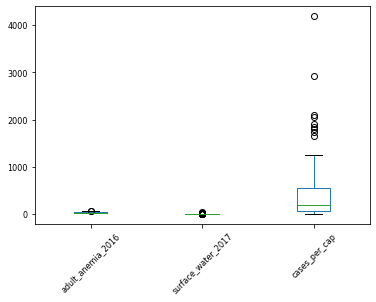

In [7]:
df.boxplot(column=['adult_anemia_2016', 'surface_water_2017', 'cases_per_cap'], grid=False, rot=45, fontsize=8)
plt.show()

Above are some subplots of different data from which we can more definatevely see that there are still some scaling issues throughout the data despite the previoius scaling.  Thus, we should work to rescale.  

The data herein is all important and a range is expected, so we do not want to remove outliers.  Thus, a min-max scaling approach may be utilized.  I will prep for this now, but wait to apply the scaling until after the data has been split.  

In [13]:
# scale the data by initializing min-max scaler and apply it to each column
df = df.set_index('country')
scaler = MinMaxScaler((-1,1))


### 4.5.2 Null Values and Outliers<a id='4.5.2_Null_Values_and_Outliers'></a>

In [14]:
df.describe()

,adult_anemia_2016,adult_blood_pressure_2015,adult_sodium_2017,basic_sanitation_2017,basic_water_2017,fruit_veg_availability_2013,government_revenue_2020,limited_sanitation_2017,limited_water_2017,nurses_and_midwives_2016,...,unimproved_sanitation_2017,unimproved_water_2017,workplaces_percent_change_from_baseline,parkinson_disease_deaths,dementia_deaths,cancers_deaths,economic_rating,macroeconomic_rating,cases_per_cap,day_number
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,29.586226,23.907645,3.843802,38.031736,39.711281,487.213512,19.861570,6.711653,3.201653,4.715661,...,7.299628,4.349752,-22.207021,1981.135125,15074.318072,51244.042766,3.385675,3.667355,432.662545,121.958678
std,11.440717,4.803936,0.745961,32.773722,37.551751,220.502567,18.063651,8.729993,5.904722,3.558705,...,12.854860,6.878651,10.693224,4904.434775,35529.155460,116635.445531,0.399830,0.438573,629.792930,31.207477
min,12.066667,10.980000,2.383333,0.000000,0.000000,63.740000,0.125000,0.000000,0.000000,0.310000,...,0.000000,0.000000,-51.948370,10.579920,61.878354,264.840294,1.833333,2.000000,0.848686,82.000000
25%,20.800000,20.615000,3.346667,8.590000,2.150000,324.650000,2.455000,0.550000,0.000000,1.800526,...,0.030000,0.050000,-29.119565,178.708640,1242.142561,5455.374725,3.166667,3.500000,58.451369,105.000000
50%,26.300000,24.090000,3.906667,29.050000,35.720000,494.090000,14.793750,2.340000,0.390000,3.758421,...,1.460000,0.890000,-23.564013,443.359336,2900.730833,12765.268103,3.270834,3.500000,192.605738,112.000000
75%,34.533333,27.600000,4.403333,66.570000,66.630000,600.950000,38.140000,10.870000,3.330000,7.330000,...,8.900000,5.280000,-14.383122,1260.064024,10423.837438,33354.394508,3.666667,4.000000,559.129313,126.000000
max,67.600000,33.550000,6.470000,100.000000,100.000000,1112.660000,88.635000,50.210000,31.720000,12.570000,...,70.320000,31.070000,11.880435,38923.974673,254246.444535,895371.427729,4.333333,4.500000,4184.692313,250.000000


Beyond seeing the scaling that we preformed earlier, `describe()` also lets us see that our counts are all 121 and thus there are no null values.  

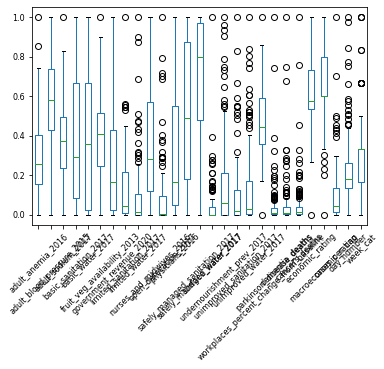

In [227]:
#cols = list(df.columns.drop('country'))
df.boxplot(column=cols, grid = False, rot=45, fontsize=8)
plt.show()

Above we see we do indeed have outliers, but we have previously confirmed that the outliers are each important so we want to keep them.

In [15]:
df.isna().sum()
#df[df.day_number.isna()]
#df[df.week_cat.isna()]

adult_anemia_2016                          0
adult_blood_pressure_2015                  0
adult_sodium_2017                          0
basic_sanitation_2017                      0
basic_water_2017                           0
fruit_veg_availability_2013                0
government_revenue_2020                    0
limited_sanitation_2017                    0
limited_water_2017                         0
nurses_and_midwives_2016                   0
open_defecation_2017                       0
physicians_2016                            0
safely_managed_sanitation_2017             0
safely_managed_water_2017                  0
surface_water_2017                         0
undernourishment_prev_2017                 0
unimproved_sanitation_2017                 0
unimproved_water_2017                      0
workplaces_percent_change_from_baseline    0
parkinson_disease_deaths                   0
dementia_deaths                            0
cancers_deaths                             0
economic_r

No null values are observed after scaling.

### 4.5.3 Predicted Variable Categorize<a id='4.5.3_Predicted_Variable_Categorize'></a>

In [16]:
#df.drop('day_number', axis=1)

In [17]:
# treat the week category as a categorical.  
#df.week_cat = df.week_cat.astype('category')
df.dtypes

adult_anemia_2016                           float64
adult_blood_pressure_2015                   float64
adult_sodium_2017                           float64
basic_sanitation_2017                       float64
basic_water_2017                            float64
fruit_veg_availability_2013                 float64
government_revenue_2020                     float64
limited_sanitation_2017                     float64
limited_water_2017                          float64
nurses_and_midwives_2016                    float64
open_defecation_2017                        float64
physicians_2016                             float64
safely_managed_sanitation_2017              float64
safely_managed_water_2017                   float64
surface_water_2017                          float64
undernourishment_prev_2017                  float64
unimproved_sanitation_2017                  float64
unimproved_water_2017                       float64
workplaces_percent_change_from_baseline     float64
parkinson_di

In [18]:
lab_enc = preprocessing.LabelEncoder()
#df.week_cat = lab_enc.fit_transform(df.week_cat)
print(utils.multiclass.type_of_target(df.week_cat))

multiclass


## 4.6 Data Training<a id='4.6_Data_Training'></a>

### 4.6.1 Split Data and Initialize Model<a id='4.6.1_Split_Model'></a>

This set of data does not have categorical features, so we will not require dummy variables, however, this is generally an important step to consider.

In [19]:
df.head()

,adult_anemia_2016,adult_blood_pressure_2015,adult_sodium_2017,basic_sanitation_2017,basic_water_2017,fruit_veg_availability_2013,government_revenue_2020,limited_sanitation_2017,limited_water_2017,nurses_and_midwives_2016,...,unimproved_water_2017,workplaces_percent_change_from_baseline,parkinson_disease_deaths,dementia_deaths,cancers_deaths,economic_rating,macroeconomic_rating,cases_per_cap,day_number,week_cat
country,,,,,,,,,,,,,,,,,,,,,
S. Korea,23.700000,10.980,5.203333,0.10,1.57,747.25,38.14,0.00,0.0,6.900000,...,0.21,-6.486413,3224.604757,29798.685258,89670.950054,3.166667,3.5,35.620943,82,3
Japan,25.600000,17.550,5.766667,1.13,0.56,425.05,38.14,0.00,0.0,6.310000,...,0.99,-13.006793,15161.514382,190560.882432,408392.273177,3.166667,3.5,49.931240,84,4
Italy,19.666667,21.170,4.050000,2.56,4.40,736.07,38.14,0.10,0.0,5.720000,...,0.56,-32.841150,7608.794566,72574.526515,182277.862996,3.166667,3.5,432.064137,86,4
Germany,18.566667,19.875,3.810000,1.99,0.20,496.91,38.14,0.77,0.0,6.186667,...,0.00,-21.465793,12619.472416,83603.200360,250892.527601,3.166667,3.5,283.413813,91,4
France,20.333333,22.050,3.813333,10.28,2.15,579.88,38.14,1.35,0.0,6.653333,...,0.00,-32.442342,7622.824664,68727.644036,180571.724245,3.166667,3.5,380.052114,91,4


In [20]:
#reset the index to get countries out of the way.  
#df = df.set_index('country')
X_cols = list(df.columns.drop(['day_number', 'week_cat']))
y_cols = list('day_number')
y1_cols = list('week_cat')

In [43]:
# remove target variable column from the dataframe, so only the predictor variables remain
X = df.drop(['day_number', 'week_cat'], axis = 1)
y = df.day_number
y1 = df.week_cat

In [44]:
#split into test/train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state = 0)

# attempt modeling without scaling
#initialize the model for continuous y
model1 = LinearRegression()

# initialize the model for discrete y1
model2 = LogisticRegression(random_state = 0)

model1, model2

(LinearRegression(), LogisticRegression(random_state=0))

Above, we prepared our data, split the data, and initialized the two regression methods we will use.  The Linear regression will be used in predicting day_number which is continuous and the Logistic regression will be used in predicting week_cat which is a discrete set of categores created from the day number.  

### 4.6.2 Fit Model<a id='4.6.2_Fit_Model'></a>

In [45]:
# fit linear model
#unscaled
#linR = 
model1.fit(X_train, y_train)
#logR = 
model2.fit(X_train1, y_train1)


C:\Users\Hailey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [46]:
print('Estimated intercept coefficient for linear regression: {}'.format(model1.intercept_))
print('Number of coefficients for linear regression: {}'.format(len(model1.coef_)))

print('Estimated intercept coefficient for logistic regression: {}'.format(model2.intercept_))
print('Number of coefficients for logistic regression: {}'.format(len(model2.coef_)))

Estimated intercept coefficient for linear regression: 254.44649986346553
Number of coefficients for linear regression: 25
Estimated intercept coefficient for logistic regression: [-4.83137857e-06 -2.47336828e-06  3.57492416e-06  2.78196533e-06
 -1.20299088e-07  8.03213020e-07  2.64943440e-07]
Number of coefficients for logistic regression: 7


Above we modeled and fit the unscaled data, now, scale and repeat.

In [47]:
# the scaled models are not showing any difference, skip this for now.
#apply the scaler
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#X_train1 = scaler.fit_transform(X_train)
#X_test1 = scaler.transform(X_test)

In [48]:
# the scaled models are working the same as the un-scaled models.  
#scaled
#linR_scaled = model1.fit(X_train, y_train)
#logR_scaled = model2.fit(X_train1, y_train1)


### 4.6.3 Look at Preliminary Model<a id='4.6.3_Look_at_Preliminary_Model'></a>

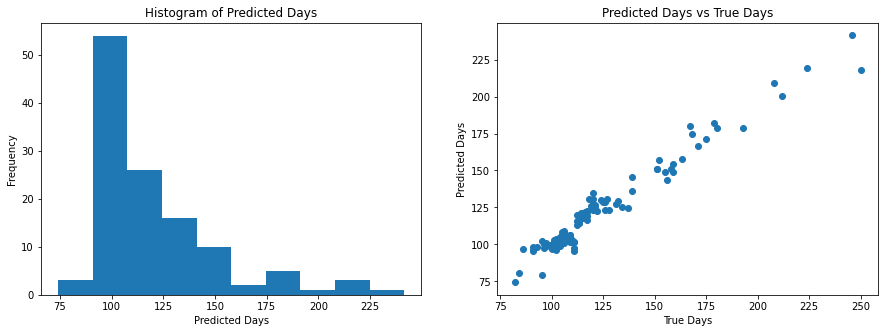

In [27]:
# Making subplots
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5));

# Plotting histograms of all the predicted days
ax1.hist(model1.predict(X));

# Labelling axis and title
ax1.set_xlabel('Predicted Days')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Predicted Days')

# Plotting predicted days vs true days
ax2.scatter(x = df.day_number, y = model1.predict(X));

# Labelling axis and title
ax2.set_ylabel('Predicted Days')
ax2.set_xlabel('True Days')
ax2.set_title('Predicted Days vs True Days');


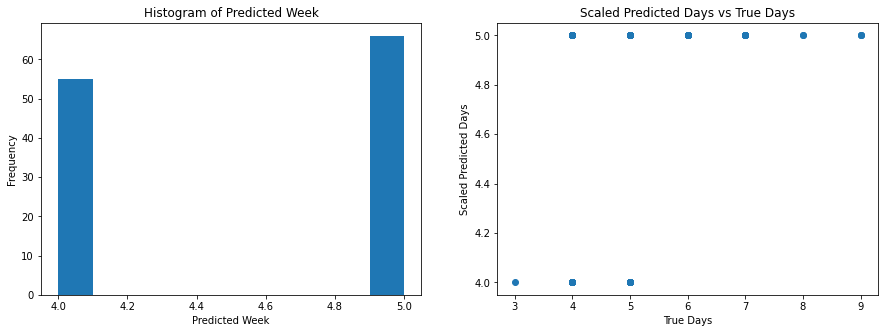

In [28]:
# Making subplots
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5));

# Plotting histograms of all the predicted days
ax1.hist(model2.predict(X));

# Labelling axis and title
ax1.set_xlabel('Predicted Week')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Predicted Week')

# Plotting predicted days vs true days
ax2.scatter(x = df.week_cat, y = model2.predict(X));

# Labelling axis and title
ax2.set_ylabel('Scaled Predicted Days')
ax2.set_xlabel('True Days')
ax2.set_title('Scaled Predicted Days vs True Days');

In [29]:
#Find the accuracy from the training data.
acc_scr = accuracy_score(model2.predict(X_train), y_train) 
print('Accuracy Score: ', str(acc_scr))

#acc_scr = accuracy_score(logR_scaled.predict(X_train), y_train) 
#print('Accuracy Score: ', str(acc_scr))

Accuracy Score:  0.0


In [54]:
from sklearn.metrics import explained_variance_score, mean_absolute_error
models = [model1, model2]
#models_scaled = [linR_scaled, logR_scaled]

for model in models:
    print('MAE for {}: {}'.format(model, mean_absolute_error(model.predict(X_train), y_train) ))
    print('EVS for {}: {}'.format(model, explained_variance_score(model.predict(X_train), y_train)))
    

MAE for LinearRegression(): 9.114619149052118
EVS for LinearRegression(): 0.7959342120363262
MAE for LogisticRegression(random_state=0): 117.75
EVS for LogisticRegression(random_state=0): -3711.879822616408


## 4.7 Summary<a id='4.7_Summary'></a>

Herein, we preprocessed the data, split the data, and created an initial model.  

The initial accuracy score for categorizing day number was very low (only ~34%), but there wasa general trend during visualization of predicted vs true days.  It seems that the predicted days are predicted about 10 days too soon.  There is also a grouping of true days from around 50-60 that are predicted between 10-20 so these are being mis-predicted.  

After categorizing days into week categories, we get much better results, including a better trend and accuracy score.

Moving forward, we will improve the model to achieve better predictions.  In order to give ourselves a baseline for improvement of prediction, let's look at a dummy classification result.  

In [39]:
from sklearn.dummy import DummyRegressor, DummyClassifier

dummyR = DummyRegressor(strategy = 'mean') 
dummyC = DummyClassifier(strategy='most_frequent')
dummyR.fit(X, y)
dummyC.fit(X,y)
acc_scr = accuracy_score(dummyC.predict(X), y)
print('Regression Score: ', str(dummyR.score(dummy.predict(X), y)))
print('Classification Score: ', str(acc_scr))

Regression Score:  0.0
Classification Score:  0.0743801652892562


Based on the dummy score for day_number (~1%), we see that this model had a lot of work to do to classify accurately. After categorizing day number into week categories, the dummy score is up to 47%.  There is a good deal that a modeling can improve from here.  Finally, after creating the week category and checking the classifier dummy score, we create a dummy classifier to see what the dummy result would be.  This shows us that the linear regression model is performing already.  

After making a first attempt and a linear regresion to find the day number, we see that the binning of the week_cat is terrible.  The only change from our previous model where we had ~91% accuracy in finding the week category is that we have removed the day_number from the predictive variables.  Clearly this set of bins is not good for our model (they were chosen rather arbirarily, so this isn't entirely unexpected!).  

Below is the confusion matrix for week_cat to give us more information if we want to continue working with binning.  

In [155]:
from sklearn.metrics import confusion_matrix

confusion_matrix(model2.predict(X_test1), y_test1)

array([[11,  4,  0,  0],
       [ 3,  4,  2,  1],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]], dtype=int64)

Our initial linear regression model is showing good results with a mean absolute error of 4.7 and an explained variance score of 0.96.  In the next steps, we will work to optimize this model and try out some alternative modeling methods.

In [218]:
# save the DataFrame
df['country'] = df.index
df.head()

,adult_anemia_2016,adult_blood_pressure_2015,adult_sodium_2017,basic_sanitation_2017,basic_water_2017,fruit_veg_availability_2013,government_revenue_2020,limited_sanitation_2017,limited_water_2017,nurses_and_midwives_2016,...,workplaces_percent_change_from_baseline,parkinson_disease_deaths,dementia_deaths,cancers_deaths,economic_rating,macroeconomic_rating,cases_per_cap,day_number,week_cat,country
country,,,,,,,,,,,,,,,,,,,,,
S. Korea,23.700000,10.980,5.203333,0.10,1.57,747.25,38.14,0.00,0.0,6.900000,...,-6.486413,3224.604757,29798.685258,89670.950054,3.166667,3.5,35.620943,82,3,S. Korea
Japan,25.600000,17.550,5.766667,1.13,0.56,425.05,38.14,0.00,0.0,6.310000,...,-13.006793,15161.514382,190560.882432,408392.273177,3.166667,3.5,49.931240,84,4,Japan
Italy,19.666667,21.170,4.050000,2.56,4.40,736.07,38.14,0.10,0.0,5.720000,...,-32.841150,7608.794566,72574.526515,182277.862996,3.166667,3.5,432.064137,86,4,Italy
Germany,18.566667,19.875,3.810000,1.99,0.20,496.91,38.14,0.77,0.0,6.186667,...,-21.465793,12619.472416,83603.200360,250892.527601,3.166667,3.5,283.413813,91,4,Germany
France,20.333333,22.050,3.813333,10.28,2.15,579.88,38.14,1.35,0.0,6.653333,...,-32.442342,7622.824664,68727.644036,180571.724245,3.166667,3.5,380.052114,91,4,France


In [10]:
datapath = '/Users/Hailey/Documents/GitHub/SBwork/Capstone2/Data'

datapath_csv = os.path.join(datapath, 'data_Processing.csv')
#if not os.path.exists(datapath_csv):
df.to_csv(datapath_csv, index = False)